In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

warnings. filterwarnings("ignore")

In [ ]:
allergies_df=pd.read_csv('/content/drive/MyDrive/Final Project1/allergies.csv')
patients_df=pd.read_csv('/content/drive/MyDrive/Final Project1/patients.csv')
careplans_df=pd.read_csv('/content/drive/MyDrive/Final Project1/careplans.csv')
imaging_studies_df=pd.read_csv('/content/drive/MyDrive/Final Project1/imaging_studies.csv')
immunizations_df=pd.read_csv('/content/drive/MyDrive/Final Project1/immunizations.csv')

'''organizations_df=pd.read_csv('/content/drive/MyDrive/Final Project1/organizations.csv')
payer_transitions_df=pd.read_csv('/content/drive/MyDrive/Final Project1/payer_transitions.csv')
payers_df=pd.read_csv('/content/drive/MyDrive/Final Project1/payers.csv')
procedures_df=pd.read_csv('/content/drive/MyDrive/Final Project1/procedures.csv')
providers_df=pd.read_csv('/content/drive/MyDrive/Final Project1/providers.csv')'''

encounters_df=pd.read_csv('/content/drive/MyDrive/Final Project1/encounters.csv')
conditions_df=pd.read_csv('/content/drive/MyDrive/Final Project1/conditions.csv')
observations_df=pd.read_csv('/content/drive/MyDrive/Final Project1/observations.csv')
medications_df=pd.read_csv('/content/drive/MyDrive/Final Project1/medications.csv')

In [ ]:
encounters_copy_df=encounters_df.copy()
conditions_copy_df=conditions_df.copy()
observations_copy_df=observations_df.copy()
medications_copy_df=medications_df.copy()
patients_copy_df=patients_df.copy()
allergies_copy_df=allergies_df.copy()
careplans_copy_df=careplans_df.copy()
immunizations_copy_df=immunizations_df.copy()

In [ ]:
print(encounters_df.shape,encounters_df.size)

(1414254, 14) 19799556


In [ ]:
observations_df.isnull().sum()

DATE                 0
PATIENT              0
ENCOUNTER      1497180
CODE                 0
DESCRIPTION          0
VALUE                0
UNITS           569662
TYPE                 0
dtype: int64

In [ ]:
df = conditions_df[conditions_df['STOP'].isnull()==True]['DESCRIPTION']
len(df.unique())

143

In [ ]:
def get_indexes(df,col):
  index_list=[]
  result=df[col].isin(outliers_df['PATIENT'])
  for i,value in enumerate(result):
    if value==True:
      index_list.append(i)
  return index_list

In [ ]:
def q25(x):
  return x.quantile(0.25)

def q50(x):
  return x.quantile(0.50)

def q75(x):
  return x.quantile(0.75)

def q85(x):
  return x.quantile(0.85)

def q95(x):
  return x.quantile(0.95)

def q98(x):
  return x.quantile(0.98)

def q90(x):
  return x.quantile(0.90)

def q95(x):
  return x.quantile(0.95)

def q96(x):
  return x.quantile(0.96)

def q98(x):
  return x.quantile(0.98)


<h2>DATA EXPLORATION</h2>

# **Encounter Dataset**

**1. Number of Unique Encounter Reasons:**

In [ ]:
(encounters_df['DESCRIPTION'].unique())
print("Number of Reasons to visit Hospital: ",(len(encounters_df['DESCRIPTION'].unique())))

Number of Reasons to visit Hospital:  54


**2. Frequency of Encounter with Reasons:**

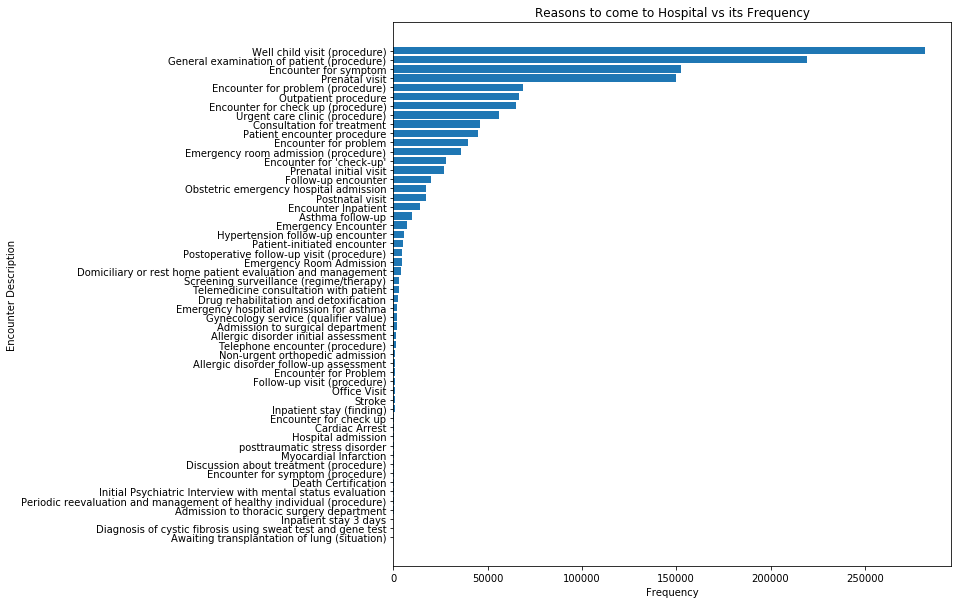

In [ ]:
#What are the different reasons(Encounter description) people come to hospital?
e_desc=encounters_df['DESCRIPTION'].value_counts().reset_index()
e_desc=e_desc.sort_values(by='DESCRIPTION')

y=np.arange(len(e_desc['index']))
plt.figure(figsize=(10,10))
plt.barh(y,e_desc['DESCRIPTION'])
plt.yticks(y,labels=list(e_desc['index']))
plt.xlabel('Frequency')
plt.ylabel('Encounter Description')
plt.title("Reasons to come to Hospital vs its Frequency")
plt.show()

Top 20 reasons Patients Encounter Hospital are the following:<br>
1. Well child visit (procedure)
2. General examination of patient (procedure)
3. Encounter for symptom
4. Prenatal visit
5. Encounter for problem (procedure)
6. Outpatient procedure
7. Encounter for check up (procedure)
8. Urgent care clinic (procedure)
9. Consultation for treatment
10. Patient encounter procedure
11. Encounter for problem
12. Emergency room admission (procedure)
13. Encounter for 'check-up'
14. Prenatal initial visit
15. Follow-up encounter
16. Obstetric emergency hospital admission
17. Postnatal visit
18. Encounter Inpatient
19. Asthma follow-up
20. Emergency Encounter

**3. Duration of each Encounter: Using Boxplot:**

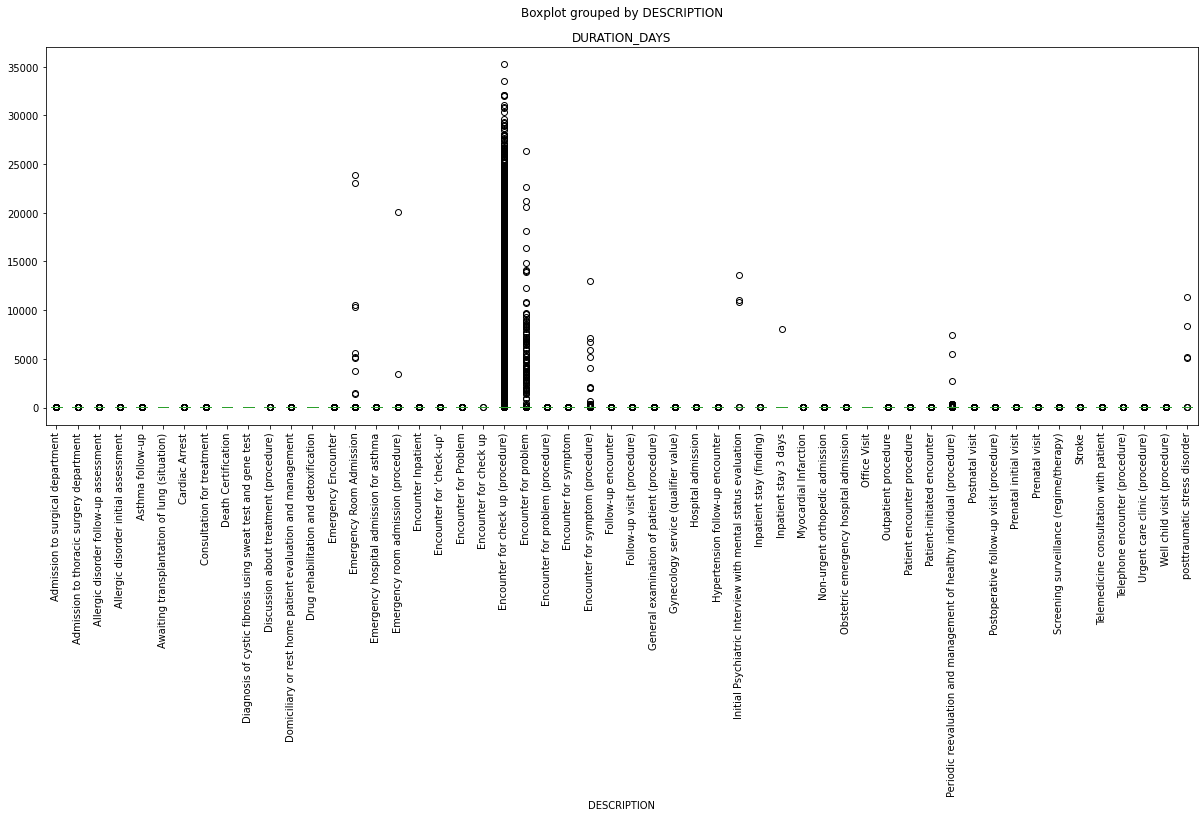

In [ ]:
#Duration of Encounters for each reason.
new_df=encounters_df 
new_df['DURATION_DAYS'] = (pd.to_datetime(encounters_df['STOP']).dt.date-pd.to_datetime(encounters_df['START']).dt.date).dt.days+1

new_df.boxplot(by='DESCRIPTION',column=['DURATION_DAYS'],grid=False,rot=90,figsize=(20,7))

Except below 8 Encounter reasons, For all other Encounters, duration is quite similar among all patients.
1. Emergency Room Admission,<br>
2. Emergency Room Admission (Procedure),<br>
3. Encounter for Problem,<br>
4. posttraumatic stress disorder<br>
5. Initial Psychiatric Interview with mental status evaluation <br>
6. Encounter for symptom (procedure) - 5% <br>
7. Inpatient stay 3 days<br>
8. Periodic reevaluation and management of healthy individual (procedure)

Lets analyze the percentage of Outliers exist in the above cases.

**Outlier Analysis based on Above Figure (Encounter Description with respect to its Duration (in Days)):**

In [ ]:
new_df.groupby('DESCRIPTION')['DURATION_DAYS'].agg(['min','max',q25,q50,q85,q90,q95,q96,q98])

,min,max,q25,q50,q85,q90,q95,q96,q98
DESCRIPTION,,,,,,,,,
Admission to surgical department,2,3,2.00,2.0,2.00,2.0,3.00,3.00,3.00
Admission to thoracic surgery department,2,3,2.00,2.0,2.00,3.0,3.00,3.00,3.00
Allergic disorder follow-up assessment,1,2,1.00,1.0,1.00,1.0,1.00,1.00,2.00
Allergic disorder initial assessment,1,2,1.00,1.0,1.00,1.0,1.00,1.00,2.00
Asthma follow-up,1,2,1.00,1.0,1.00,1.0,1.00,1.00,1.00
Awaiting transplantation of lung (situation),4,5,4.25,4.5,4.85,4.9,4.95,4.96,4.98
Cardiac Arrest,1,2,1.00,1.0,1.00,1.0,2.00,2.00,2.00
Consultation for treatment,1,2,1.00,1.0,1.00,1.0,1.00,1.00,1.00
Death Certification,1,1,1.00,1.0,1.00,1.0,1.00,1.00,1.00


Based on the above analysis, the occurance of outliers with respect to **Encounter Duration** are <br>

**less than 1%** in below 4 Encounter Description.<br>
1. Emergency Room Admission,<br>
2. Emergency Room Admission (Procedure),<br>
3. Encounter for Problem,<br>
4. posttraumatic stress disorder<br>
**About 3% outliers** in below Encounter description <br>
Initial Psychiatric Interview with mental status evaluation <br>

**About 10% Outliers** in below 3 Encounter description .<br>
Encounter for symptom (procedure) - 5% <br>
Inpatient stay 3 days<br>
Periodic reevaluation and management of healthy individual (procedure)

Before Handling Outlier data, lets combine these outliers with Conditions and once again we will check the distribution of combined features

**4. How many encounters do patients have?**

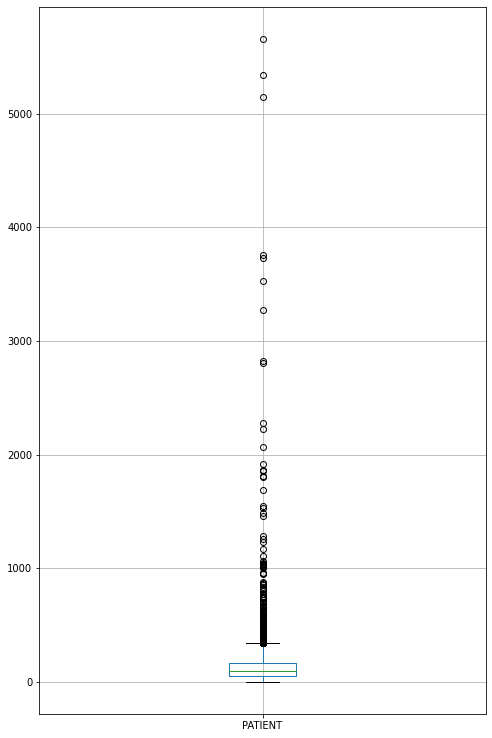

In [ ]:
count_df=encounters_df.groupby('PATIENT',as_index=False)['PATIENT'].count()
#count_df[count_df['PATIENT']>1000]
count_df.boxplot(column='PATIENT',figsize=(8,13))


In [ ]:
count_df.quantile(0.97)

PATIENT    306.0
Name: 0.97, dtype: float64

In [ ]:
print("Number of Patients have more than 450 or less than 25 Encounters: ",count_df[(count_df['PATIENT']<25) | (count_df['PATIENT']>310)].count()['PATIENT'])

Number of Patients have more than 450 or less than 25 Encounters:  1479


Based on the above plot, To separate the outliers lets create a fence between the range of 10% to 97%. 

**Removing Outliers** - based on Number of Encounters

In [ ]:
outliers_df=encounters_df.groupby('PATIENT').filter(lambda x: (x['Id'].count() > 310) | (x['Id'].count() < 25)) 
outlier_ind=outliers_df.index

In [ ]:
patients_copy_df.drop(get_indexes(patients_df,'Id'),inplace=True)
encounters_copy_df.drop(get_indexes(encounters_df,'Id'),inplace=True)
conditions_copy_df.drop(get_indexes(conditions_df,'PATIENT'),inplace=True)
observations_copy_df.drop(get_indexes(observations_df,'PATIENT'),inplace=True)
medications_copy_df.drop(get_indexes(medications_df,'PATIENT'),inplace=True)
allergies_copy_df.drop(get_indexes(allergies_df,'PATIENT'),inplace=True)
immunizations_copy_df.drop(get_indexes(immunizations_df,'PATIENT'),inplace=True)
careplans_copy_df.drop(get_indexes(careplans_df,'PATIENT'),inplace=True)

In [ ]:
encounters_copy_df.rename(columns={'START':'ENCOUNTER_START','STOP':'ENCOUNTER_STOP','DESCRIPTION':'ENCOUNTER_DESC'},inplace=True)
conditions_copy_df.rename(columns={'START':'CONDITIONS_START','STOP':'CONDITIONS_STOP','DESCRIPTION':'CONDITIONS_DESC'},inplace=True)
observations_copy_df.rename(columns={'DESCRIPTION':'OBSERVATION_DESC'},inplace=True)
medications_copy_df.rename(columns={'START':'MEDICATION_START','STOP':'MEDICATION_STOP','DESCRIPTION':'MEDICATION_DESC','BASE_COST':'MEDICATION_BASE_COST'},inplace=True)
immunizations_copy_df.rename(columns={'DESCRIPTION':'Immunizations_DESC','BASE_COST':'IMMUNIZATION_BASE_COST'},inplace=True)
allergies_copy_df.rename(columns={'DESCRIPTION':'ALLERGIES_DESC'},inplace=True)

After removing Outlier Patients from Encounters dataframe,

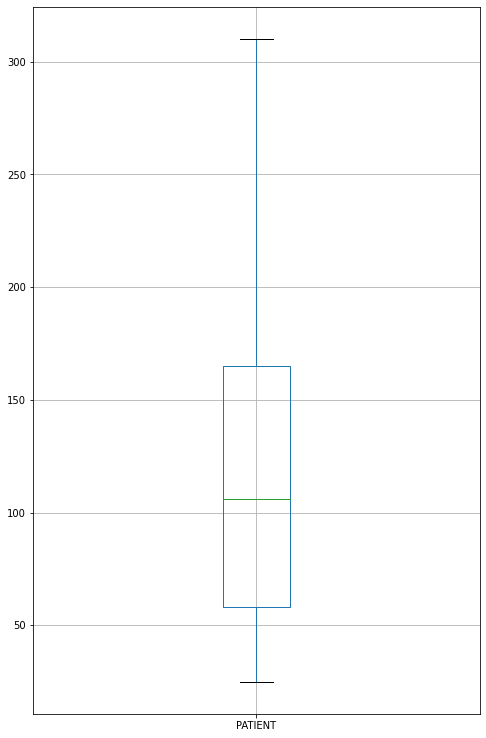

In [ ]:
count_df=encounters_copy_df.groupby('PATIENT',as_index=False)['PATIENT'].count()
#count_df[count_df['PATIENT']>1000]
count_df.boxplot(column='PATIENT',figsize=(8,13))

In [ ]:
len(encounters_copy_df['PATIENT'].unique())

10149

# **Conditions Dataset**

**1. Number of Unique Conditions that Patients are diagnosed with:**

In [ ]:
(conditions_copy_df['DESCRIPTION'].unique())
print("Number of unique Conditions in Patients: ",(len(conditions_copy_df['DESCRIPTION'].unique())))
print("Number of Conditions stay in Patients for life long (i.e., do not have stop date): ",(len(conditions_copy_df[conditions_df['STOP'].isnull()==True]['DESCRIPTION'].unique())))

Number of unique Conditions in Patients:  153
Number of Conditions stay in Patients for life long (i.e., do not have stop date):  138


**2. Conditions that stay life long and its Frequency**

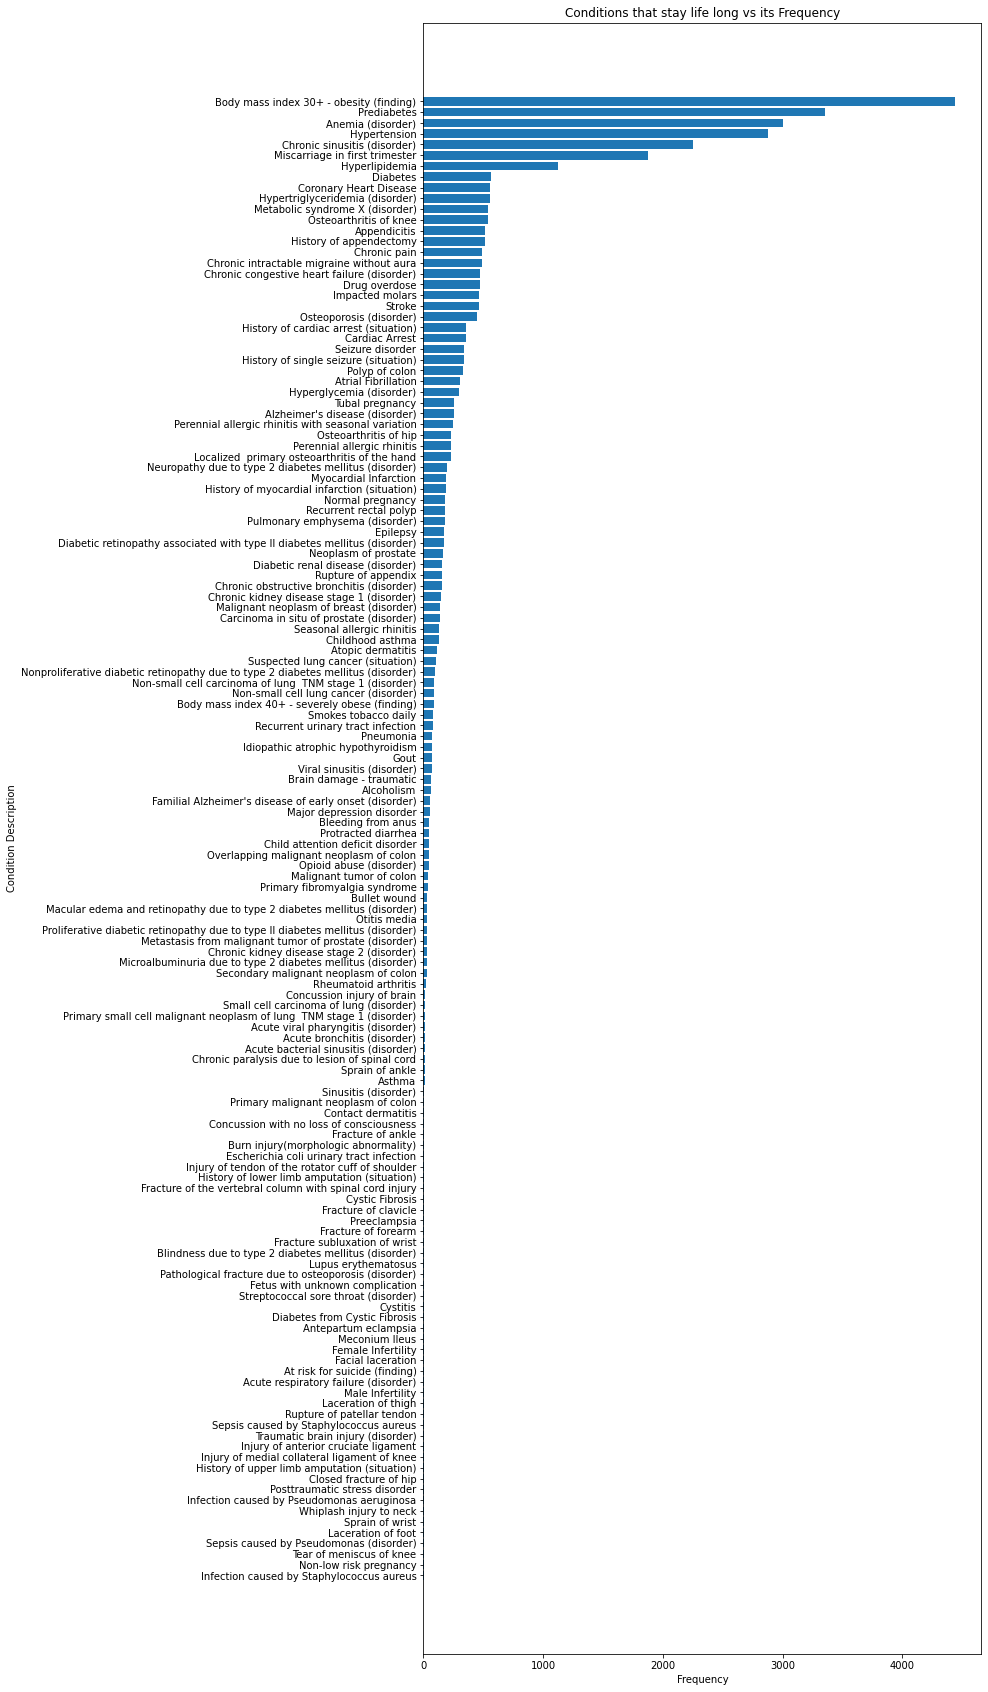

In [ ]:
#What are the Chronic Conditions in Patients and its frequency
cond=conditions_copy_df[conditions_copy_df['STOP'].isnull()==True]['DESCRIPTION'].value_counts().reset_index()
cond=cond.sort_values(by='DESCRIPTION')
y=np.arange(len(cond['index']))
plt.figure(figsize=(10,30))
plt.barh(y,cond['DESCRIPTION'])
plt.yticks(y,labels=list(cond['index']))
plt.xlabel('Frequency')
plt.ylabel('Condition Description')
plt.title("Conditions that stay life long vs its Frequency")
plt.show()

Top 20 conditions that Patients are diagnosed with:
1. Body mass index 30+ -obesity (finding)
2. Prediabetes
3. Anemia (disorder)
4. Hypertension
5. Chronic sinusitis (disorder)
6. Miscarriage in first trimester
7. Hyperlipidemia
8. Diabetes
9. Coronary Heart Disease
10. Hypertriglyceridemia (disorder)
11. Metabolic syndrome X (disorder)
12. Osteoarthritis of Knee
13. Appendicitis
14. History of appendectomy
15. Chronic pain
16. Chronic intractable migraine without aura
17. Chronic congestive heart failure (disorder)
18. Drug overdose
19. Impacted molars
20. Stroke

**3. Duration of Conditions patient diagnosed with**

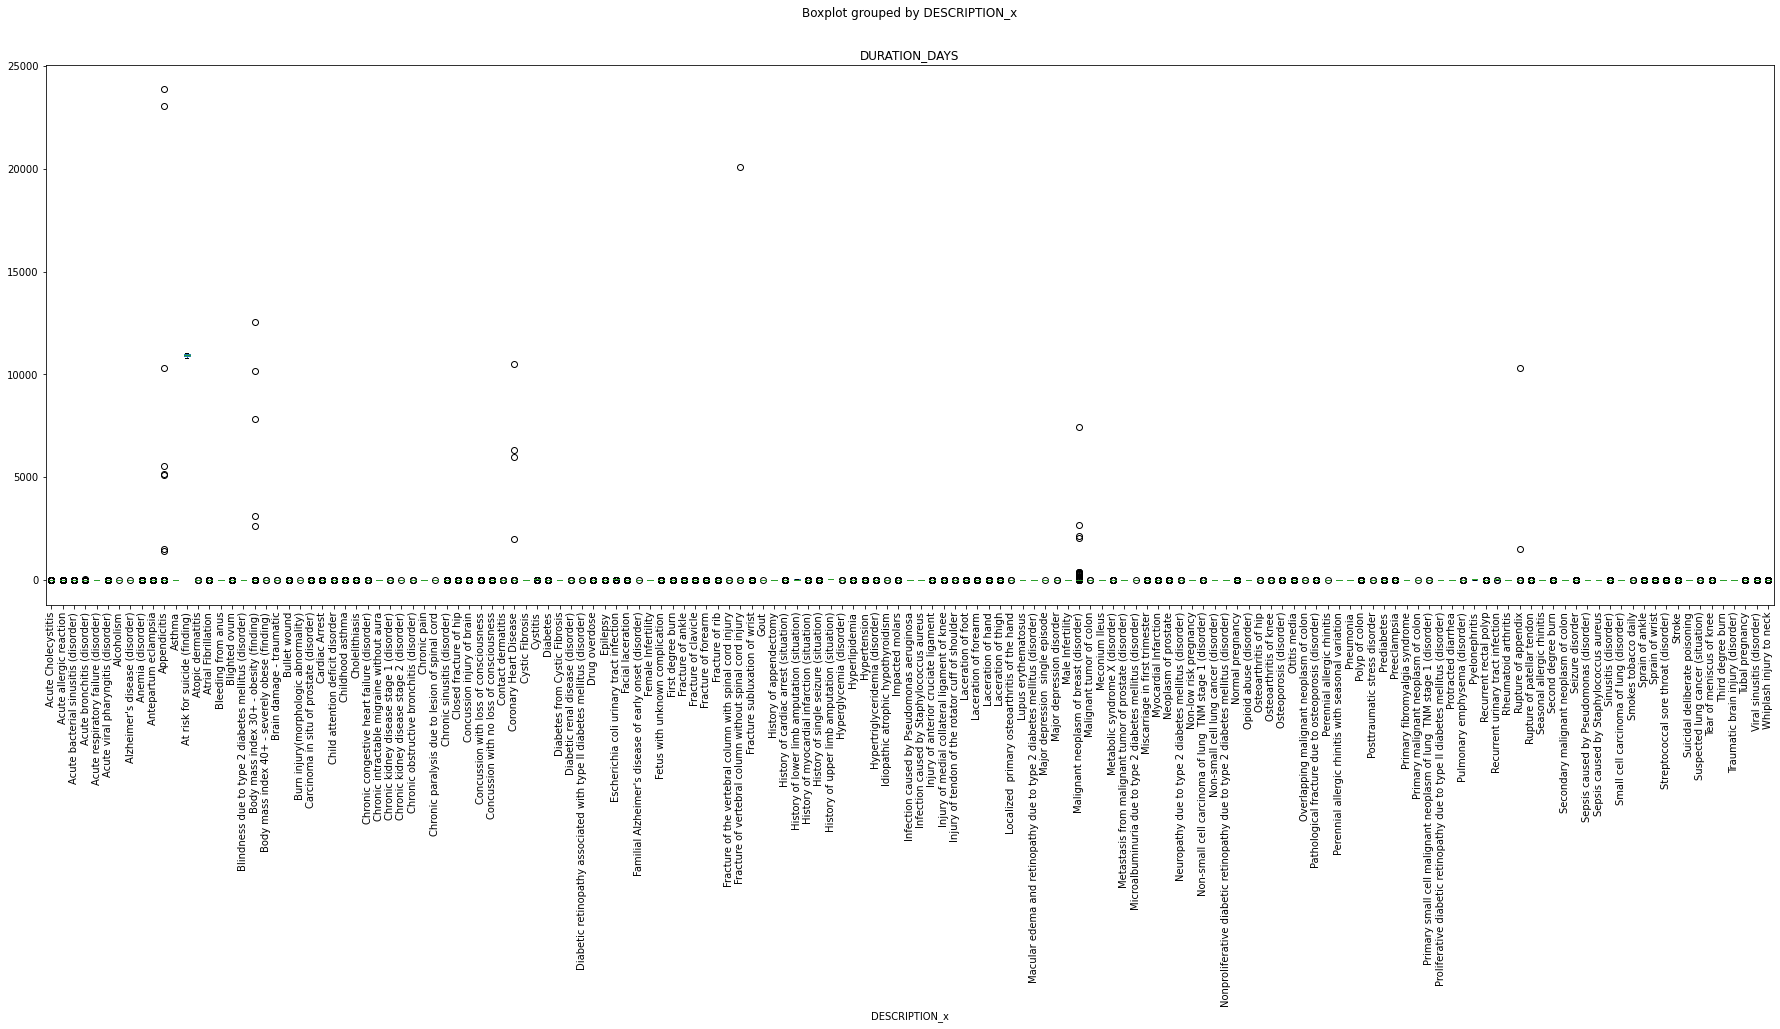

In [ ]:
combined = pd.merge(conditions_copy_df,new_df,how='inner',left_on=['ENCOUNTER'],right_on=['Id'])

#duration=combined.groupby('DESCRIPTION_x')['DURATION_DAYS'].agg(['min','max']).reset_index()
combined.boxplot(by='DESCRIPTION_x',column=['DURATION_DAYS'],grid=False,rot=90,figsize=(30,10))

From the above boxplot, There are Outliers wrt Encounter duration for the below conditions<br>
1. Appendicitis<br>
2. Body ,mass index 30+ obesity(finding)<br>
3. coronary heart disease<br>
4. Fracture of the vertebral column with spinal surgery<br>
5. Malignant neoplasm of breast(disorder)<br>
6. Rupture of appendix<br>



**Removing Outliers** - Based on Frequency of Conditions

Lets create a fence between 25 to 95% of Patients diagnosed with Conditions

In [ ]:
conditions_copy_df.shape

(237700, 6)

In [ ]:
df=conditions_copy_df['CONDITIONS_DESC'].value_counts().reset_index()
outlierConditions=df[(df['CONDITIONS_DESC']<50) | (df['CONDITIONS_DESC']>5000)]['index']
outlierIndexes=conditions_copy_df[conditions_copy_df['CONDITIONS_DESC'].isin(outlierConditions)].index
conditions_copy_df.drop(outlierIndexes,axis=0,inplace=True)

In [ ]:
conditions_copy_df.shape

(80338, 6)

# **Observations Dataset**

In [ ]:
#original shape
observations_copy_df.shape

(8969383, 8)

In [ ]:
#dropping duplicates
observations_copy_df.drop_duplicates(subset=["ENCOUNTER","PATIENT","OBSERVATION_DESC"],keep='last',inplace=True)

In [ ]:
#after deleting duplicates
observations_copy_df.shape

(7420153, 8)

In [ ]:
print("Unique Observations count",len(observations_copy_df['OBSERVATION_DESC'].unique()))

Unique Observations count 180


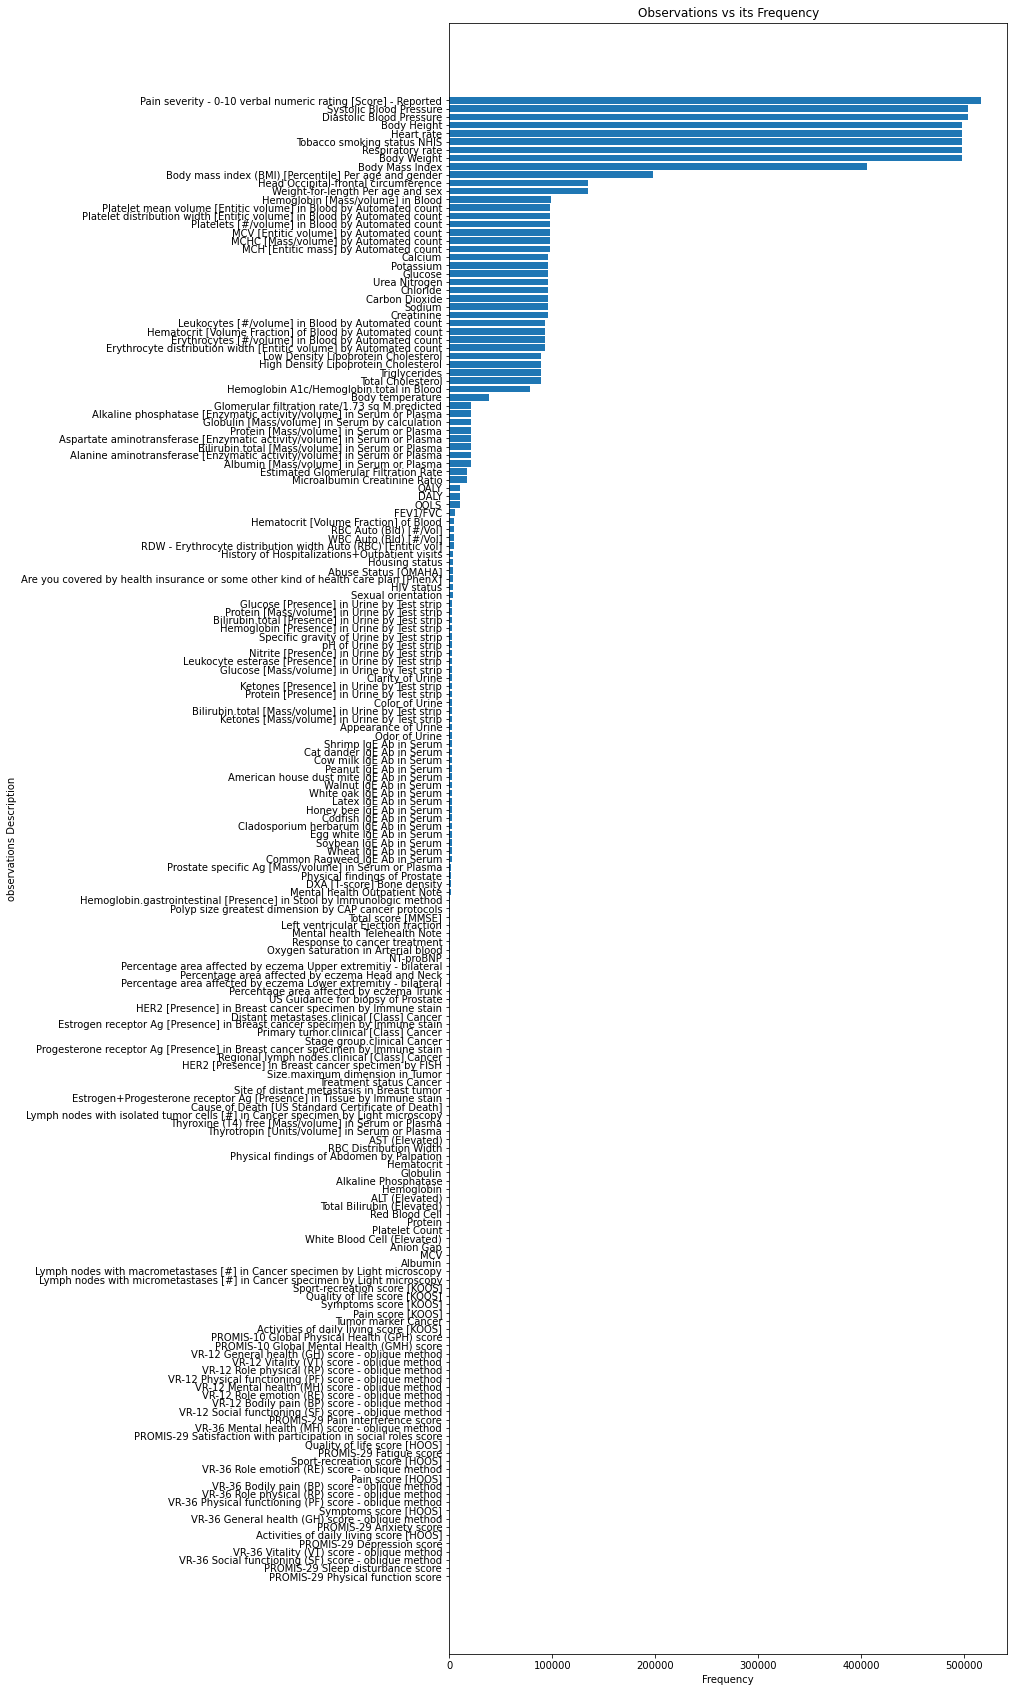

In [ ]:
# display Observations vs its Frequency
observations=observations_copy_df['OBSERVATION_DESC'].value_counts().reset_index()
observations=observations.sort_values(by='OBSERVATION_DESC')
y=np.arange(len(observations['index']))
plt.figure(figsize=(10,30))
plt.barh(y,observations['OBSERVATION_DESC'])
plt.yticks(y,labels=list(observations['index']))
plt.xlabel('Frequency')
plt.ylabel('observations Description')
plt.title("Observations vs its Frequency")
plt.show()

**Removing Outliers** - Observations that recorded very low among patients

In [ ]:
observations[observations['OBSERVATION_DESC']>10000]['OBSERVATION_DESC'].sum()

7420153

97% (7420153) of the Observations are more frequently observed among Patients(i.e., more than 10000 times). So dropping rest 3% of the observations.

In [ ]:
low_freq_obser=observations[observations['OBSERVATION_DESC']<10000]['index']
indexes=observations_copy_df[observations_copy_df['OBSERVATION_DESC'].isin(low_freq_obser)].index
observations_copy_df.drop(indexes,inplace=True,axis=0)

In [ ]:
features=observations_copy_df['OBSERVATION_DESC'].unique().tolist()
len(features)

50

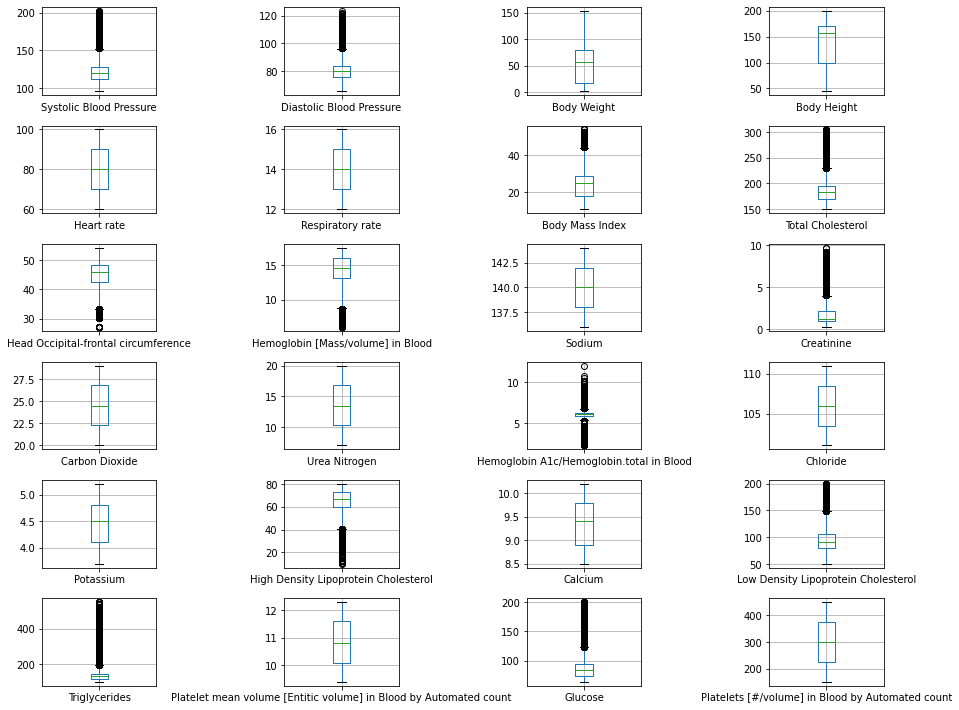

In [ ]:
features=['Systolic Blood Pressure','Diastolic Blood Pressure','Body Weight','Body Height',
          'Heart rate', 'Respiratory rate','Body Mass Index','Total Cholesterol',
          'Head Occipital-frontal circumference','Hemoglobin [Mass/volume] in Blood','Sodium',
          'Creatinine','Carbon Dioxide','Urea Nitrogen','Hemoglobin A1c/Hemoglobin.total in Blood',
          'Chloride','Potassium','High Density Lipoprotein Cholesterol','Calcium',
          'Low Density Lipoprotein Cholesterol','Triglycerides','Platelet mean volume [Entitic volume] in Blood by Automated count','Glucose',
          'Platelets [#/volume] in Blood by Automated count',]


fig, axes = plt.subplots(6,4,figsize=(13,10))
for i,val in enumerate(features):
  if val!='Tobacco smoking status NHIS':
    df=observations_copy_df[observations_copy_df['OBSERVATION_DESC']==val]
    df.rename(columns = {'VALUE':val}, inplace = True)
    a=df[val].astype(float).reset_index().boxplot(column=val,ax=axes.flatten()[i])
#fig.delaxes(axes[1,1])
plt.tight_layout() 
plt.show()

**Feature Engineering**

In [ ]:
# Row vice stacking of Observations will be transformed to column vice for each patient with respective Encounter
grouped_observations=observations_copy_df.pivot(index=['PATIENT','ENCOUNTER'],columns='OBSERVATION_DESC',values='VALUE').reset_index()

# **MEDICATIONS**

In [ ]:
len(medications_copy_df['DESCRIPTION'].unique())

167

In [ ]:
medications_copy_df.drop_duplicates(subset=["ENCOUNTER","PATIENT","MEDICATION_DESC"],keep='last',inplace=True)

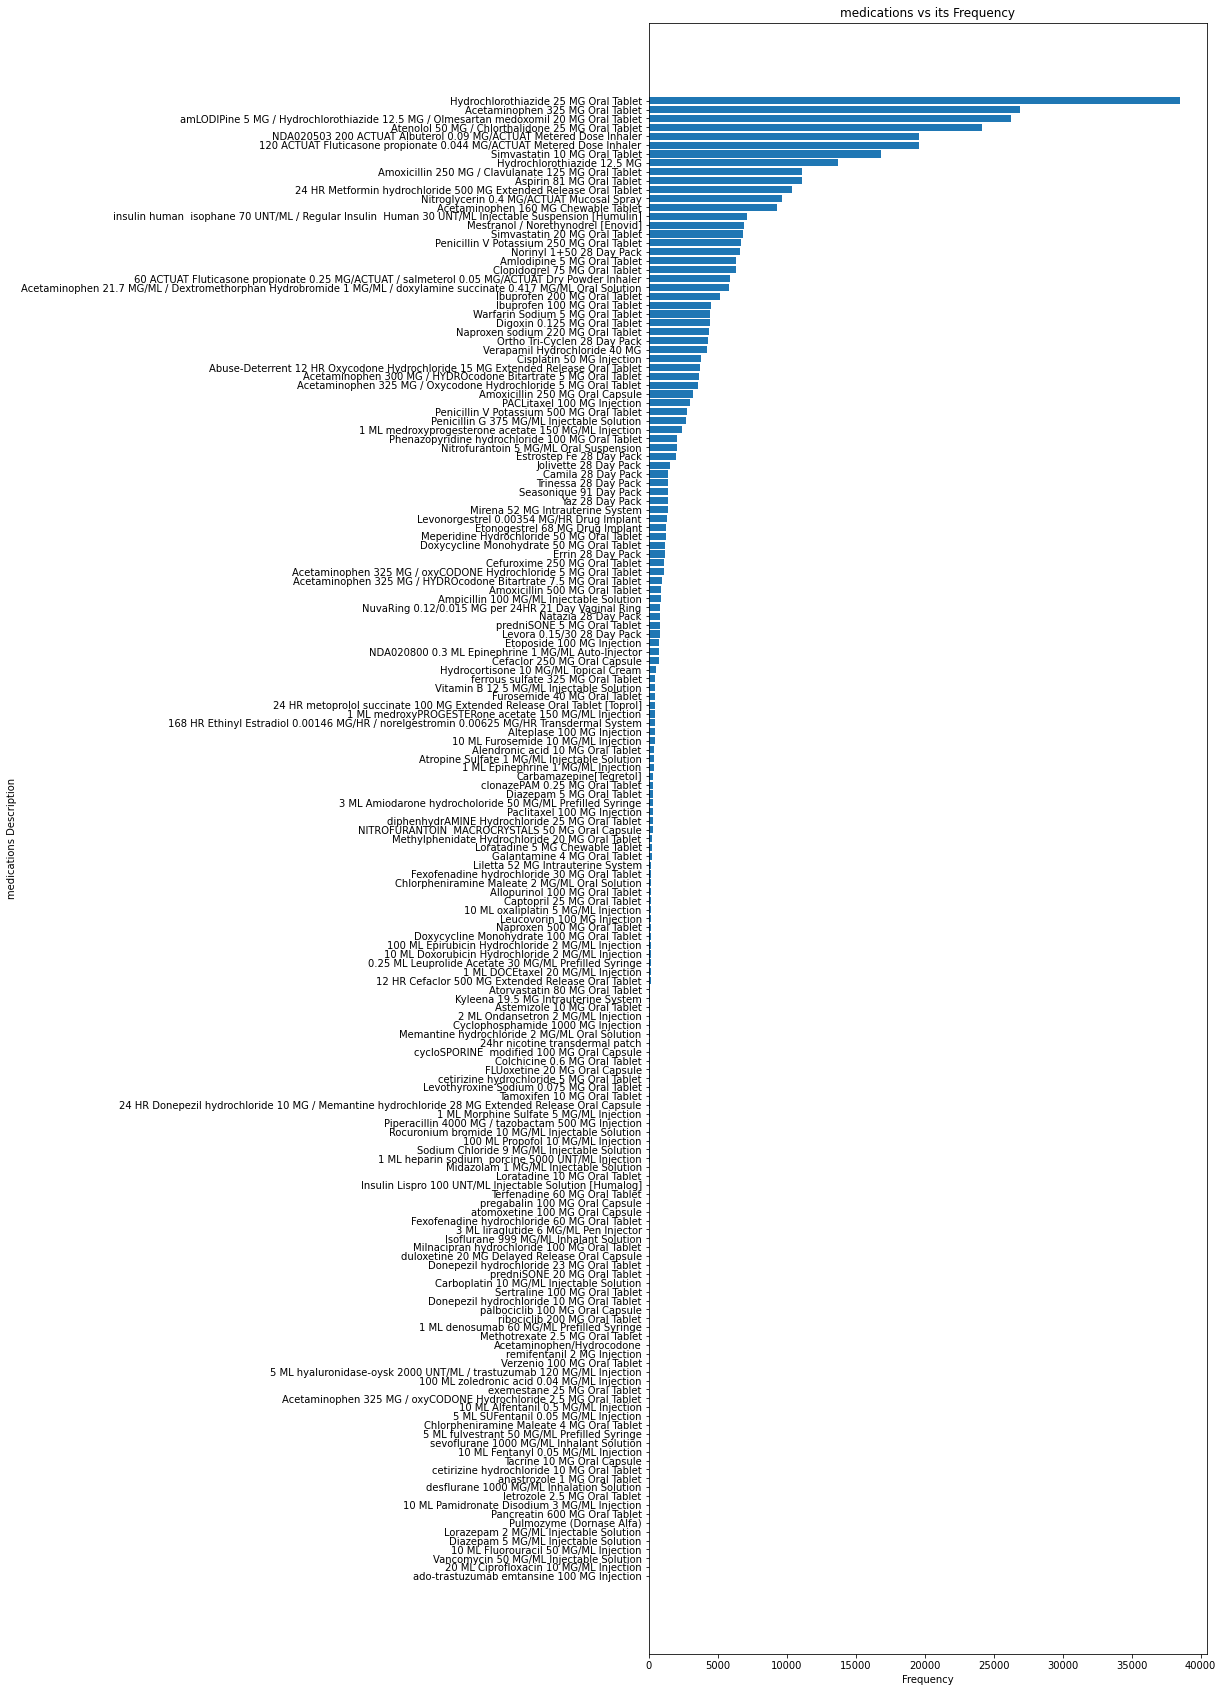

In [ ]:
medications=medications_copy_df['DESCRIPTION'].value_counts().reset_index()
medications=medications.sort_values(by='DESCRIPTION')
y=np.arange(len(medications['index']))
plt.figure(figsize=(10,30))
plt.barh(y,medications['DESCRIPTION'])
plt.yticks(y,labels=list(medications['index']))
plt.xlabel('Frequency')
plt.ylabel('medications Description')
plt.title("medications vs its Frequency")
plt.show()

# **Combining Datasets**

In [ ]:
#merging Encounters and Patients
pe=pd.merge(encounters_copy_df,patients_copy_df,how='inner',left_on='PATIENT',right_on='Id')
pe.shape

(1193879, 39)

In [ ]:
pe.drop(['Id_y','BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX','FIRST','LAST','SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY','BIRTHPLACE', 'ADDRESS', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],axis=1,inplace=True)

In [ ]:
#merging Encounters, Patients with Conditions
merged_pa_en_co=pd.merge(pe,conditions_copy_df,how='inner',left_on='Id_x',right_on='ENCOUNTER')

In [ ]:
#merging above data with Observations
merged_pa_en_co_ob=pd.merge(merged_pa_en_co,grouped_observations,how='inner',left_on='Id_x',right_on='ENCOUNTER')

In [ ]:
merged_pa_en_co_ob.shape

(24408, 74)

In [ ]:
merged_pa_en_co_ob.drop(['PROVIDER','PAYER','PATIENT_y','ENCOUNTERCLASS','ENCOUNTER_x','PATIENT','ENCOUNTER_y','CODE_x','CODE_y','REASONCODE','REASONDESCRIPTION','ENCOUNTER_x','ENCOUNTER_y'],inplace=True,axis=1)

In [ ]:
merged_pa_en_co_ob.shape

(24408, 63)

In [ ]:
merged_pa_en_co_ob.to_csv('/content/drive/MyDrive/Final Project1/Data Process/InputData.csv',index=False)

In [ ]:
working_df=merged_pa_en_co_ob[['PATIENT_x','CONDITIONS_START','CONDITIONS_DESC','Body Mass Index','Diastolic Blood Pressure','Tobacco smoking status NHIS']].copy()

In [ ]:
working_df.shape

(24408, 6)

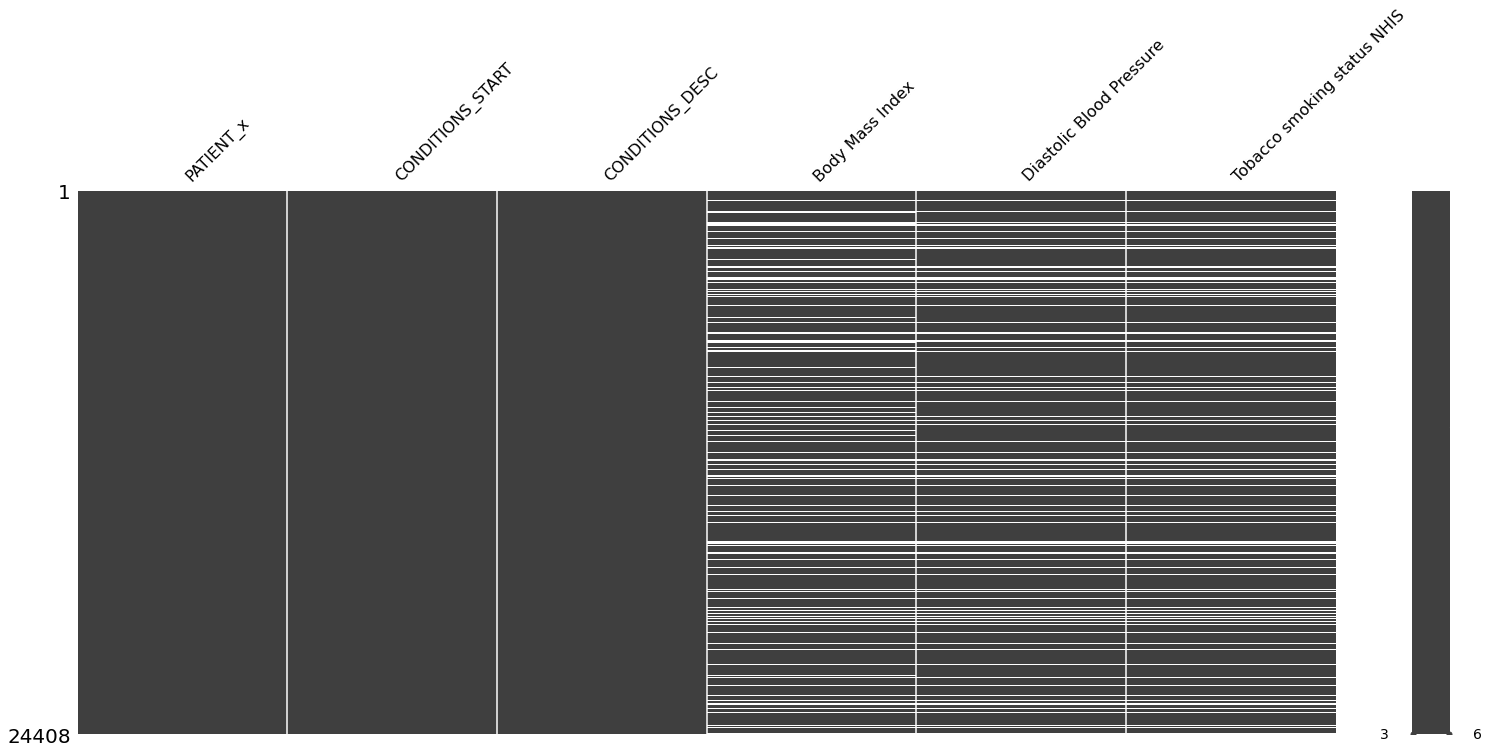

In [ ]:
msno.matrix(working_df)

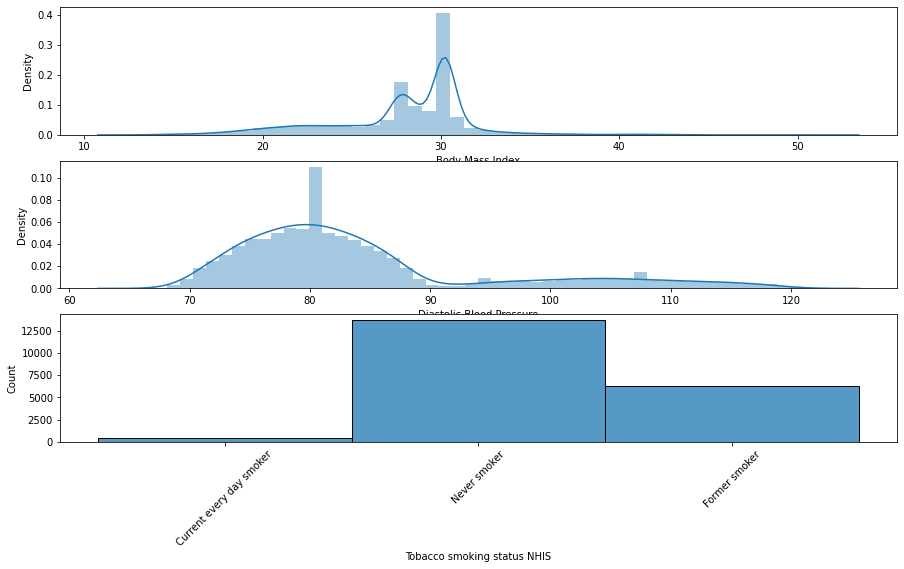

In [ ]:
#features=['Body Mass Index','Glucose','Diastolic Blood Pressure','Heart rate','Respiratory rate','Tobacco smoking status NHIS','Hemoglobin A1c/Hemoglobin.total in Blood','Total Cholesterol']
fig, axes = plt.subplots(3,1,figsize=(15,8))
sns.distplot(working_df['Body Mass Index'],ax=axes.flatten()[0])
#sns.distplot(working_df['Glucose'],ax=axes.flatten()[1])
sns.distplot(working_df['Diastolic Blood Pressure'],ax=axes.flatten()[1])
sns.histplot(working_df['Tobacco smoking status NHIS'],ax=axes.flatten()[2])
axes.flatten()[2].tick_params(axis='x', rotation=45)
#sns.distplot(working_df['Hemoglobin A1c/Hemoglobin.total in Blood'],ax=axes.flatten()[4])
#sns.distplot(working_df['Total Cholesterol'],ax=axes.flatten()[5])

In [ ]:
working_df['YEAR']=pd.to_datetime(merged_pa_en_co_ob['ENCOUNTER_START']).dt.year

**Imputation** - Filling missing value for each patient based on respective Forward and Backward values of Patient

In [ ]:
working_df['Body Mass Index'] = working_df['Body Mass Index'].fillna(working_df.groupby('PATIENT_x')['Body Mass Index'].transform(lambda x: x.interpolate(method='linear').ffill().bfill())).astype(float)
working_df['Diastolic Blood Pressure'] = working_df['Diastolic Blood Pressure'].fillna(working_df.groupby('PATIENT_x')['Diastolic Blood Pressure'].transform(lambda x: x.interpolate(method='linear').ffill().bfill())).astype(float)
working_df['Tobacco smoking status NHIS'] = working_df['Tobacco smoking status NHIS'].fillna(working_df.groupby('PATIENT_x')['Tobacco smoking status NHIS'].transform(lambda x: x.interpolate(method='linear').ffill().bfill()))

In [ ]:
working_df.isnull().sum()

PATIENT_x                        0
CONDITIONS_START                 0
CONDITIONS_DESC                  0
Body Mass Index                433
Diastolic Blood Pressure       343
Tobacco smoking status NHIS    343
YEAR                             0
dtype: int64

In [ ]:
working_df.dropna(inplace=True)

In [ ]:
working_df.drop('CONDITIONS_START',axis=1,inplace=True)

In [ ]:
working_df=working_df.groupby(['PATIENT_x','YEAR']).agg({'Body Mass Index':'mean',
                                              'Diastolic Blood Pressure':'mean',
                                              'Tobacco smoking status NHIS':'last',
                                              'CONDITIONS_DESC':lambda x: ','.join(x)})

In [ ]:
working_df=working_df.reset_index()
working_df=working_df[working_df.groupby('PATIENT_x')['PATIENT_x'].transform('count')>2]

In [ ]:
recent_encounters_df = working_df.groupby(['PATIENT_x']).last()
recentpast_encounters_df=working_df.groupby(['PATIENT_x']).nth(-2)
past_encounters_df=working_df.groupby(['PATIENT_x']).nth(-3)

In [ ]:
recentpast_encounters_df.rename(columns={'Body Mass Index':'recentPast BMI','Diastolic Blood Pressure':'recentPast BP','Tobacco smoking status NHIS':'recentPast Smoking Status','YEAR':'previous_Encounteryear','CONDITIONS_DESC':'previous_encounter_diagnosed_condition'},inplace=True)
past_encounters_df.rename(columns={'Body Mass Index':'Past BMI','Diastolic Blood Pressure':'Past BP','Tobacco smoking status NHIS':'Past Smoking Status','YEAR':'past_Encounteryear','CONDITIONS_DESC':'past_encounter_diagnosed_condition'},inplace=True)

In [ ]:
merged=pd.merge(recent_encounters_df,recentpast_encounters_df,how='inner',left_on='PATIENT_x',right_on='PATIENT_x')
finaldata=pd.merge(merged,past_encounters_df,how='inner',left_on='PATIENT_x',right_on='PATIENT_x')

In [ ]:
finaldata.shape

(3298, 18)

In [ ]:
def get_final_x(col_x1,col_x2,col_y):
  x1,x2,y=finaldata['recentPast BP'],finaldata['Past BP'],finaldata[col_y]
  x1,x2,y=np.array(x1),np.array(x2),np.array(y)
  x1,x2,y=x1.reshape(-1,1),x2.reshape(-1,1),y.reshape(-1,1)
  final_x=np.concatenate((x1,x2),axis=1)
  return final_x,y


In [ ]:
def split_train_test(x,y):
  return x[:-30],x[-700:],y[:-30],y[-700:]


In [ ]:
def train_models(X_train,X_test,y_train):
  lin_model=LinearRegression()
  forest_model=RandomForestRegressor(n_estimators=100,max_features=2, random_state=1)
  lin_model.fit(X_train,y_train)
  forest_model.fit(X_train,y_train)
  lin_pred=lin_model.predict(X_test)
  forest_pred=forest_model.predict(X_test)
  return lin_pred,forest_pred

# **PREDICT BP for each patient based on his history**

In [ ]:
# get input x and output y for column - BP
input_BP,output_BP=get_final_x('recentPast BP','Past BP','Diastolic Blood Pressure')
# split train and test
X_train,X_test,y_train,y_test=split_train_test(input_BP,output_BP)
# fit and predict
lin_pred_BP,random_pred_BP=train_models(X_train,X_test,y_train)

**Linear Regression to Predict BP:**

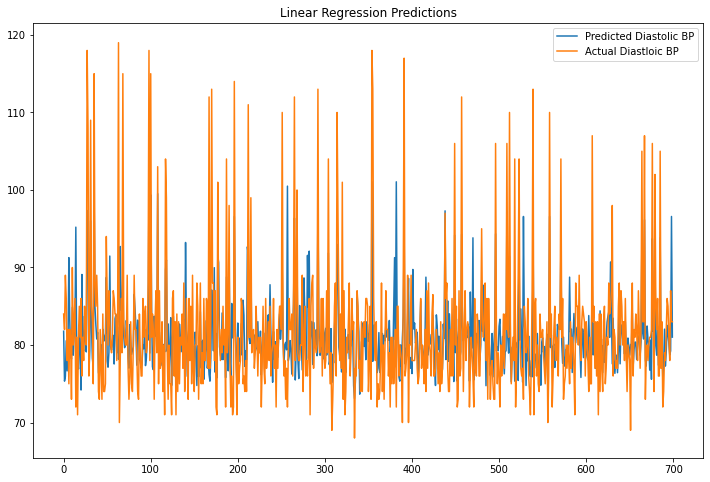

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred_BP,label='Predicted Diastolic BP')
plt.plot(y_test,label='Actual Diastloic BP')
plt.legend(loc="upper right")
plt.title('Linear Regression Predictions')
plt.show()

**Random Forest Regressor to Predict BP:**

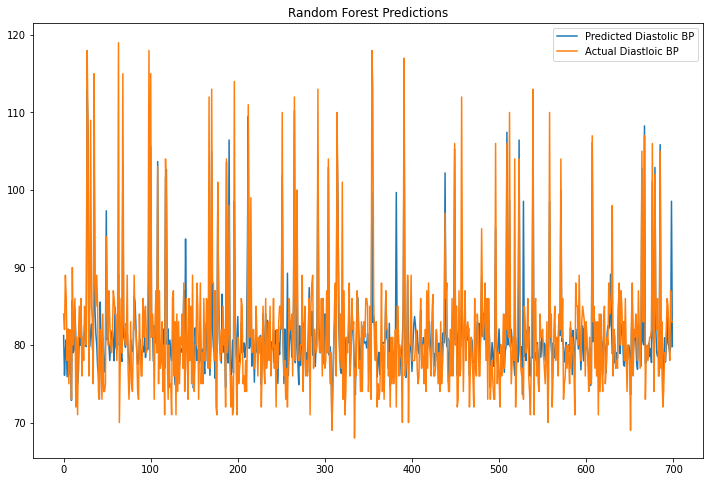

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(random_pred_BP,label='Predicted Diastolic BP')
plt.plot(y_test,label='Actual Diastloic BP')
plt.legend(loc="upper right")
plt.title('Random Forest Predictions')
plt.show()

# **PREDICT BMI** - For each patient based on his history

In [ ]:
# get input x and output y for column - BP
input_BMI,output_BMI=get_final_x('recentPast BMI','Past BMI','Body Mass Index')
# split train and test
X_train,X_test,y_train,y_test=split_train_test(input_BMI,output_BMI)
# fit and predict
lin_pred_BMI,random_pred_BMI=train_models(X_train,X_test,y_train)

**Linear Regression to predict BMI**

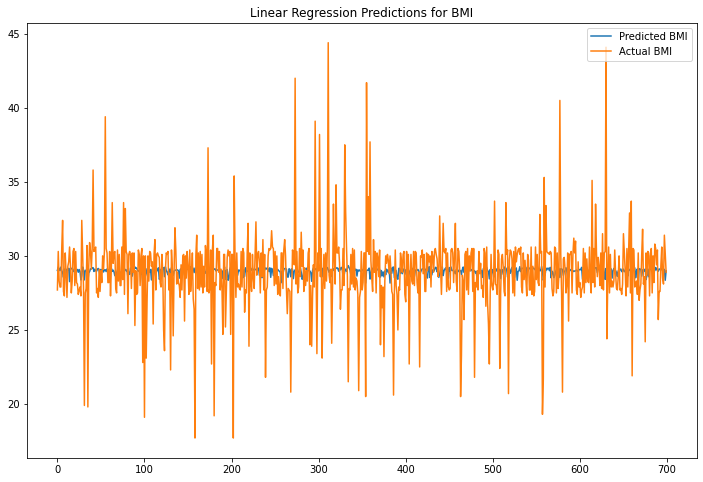

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred_BMI,label='Predicted BMI')
plt.plot(y_test,label='Actual BMI')
plt.legend(loc="upper right")
plt.title('Linear Regression Predictions for BMI')
plt.show()

**Random Forest Regression for BMI**

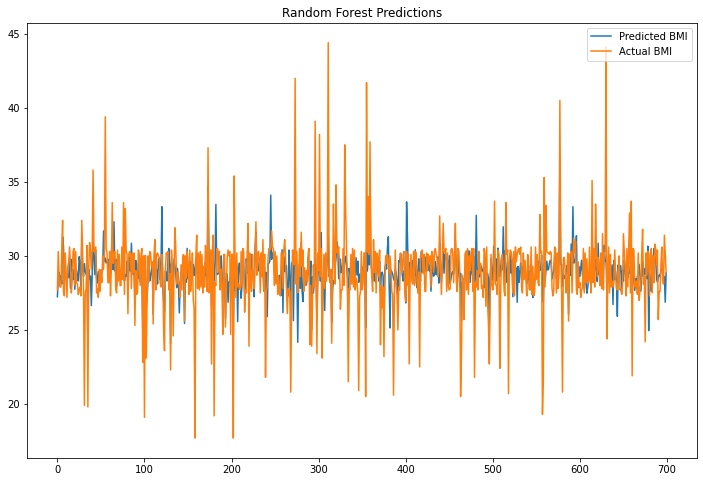

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(random_pred_BMI,label='Predicted BMI')
plt.plot(y_test,label='Actual BMI')
plt.legend(loc="upper right")
plt.title('Random Forest Predictions')
plt.show()

# **Performance Metric**

**Mean Squared Error for BMI**

In [ ]:
rmse_rf=sqrt(mean_squared_error(random_pred_BMI,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred_BMI,y_test))
print('Mean Squared Error for BMI using Random Forest Model is:',rmse_rf)
print('Mean Squared Error for BMI using Linear Regression Model is:',rmse_lr)

Mean Squared Error for BMI using Random Forest Model is: 2.360077718117223
Mean Squared Error for BMI using Linear Regression Model is: 2.705612015223196


**MSE (mean squared error) for BP**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(random_pred_BP,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred_BP,y_test))
print('Mean Squared Error for BP using Random Forest Model is:',rmse_rf)
print('Mean Squared Error for BP using Linear Regression Model is:',rmse_lr)

Mean Squared Error for BP using Random Forest Model is: 5.367497137934423
Mean Squared Error for BP using Linear Regression Model is: 6.989515737986467


Among two chosen Algorithms, Random Forest Regressor yielded less MeanSquare Error.

# **Deterministic Approach to predict Hypertension & Obesity**

In [ ]:
condition=[]
for BMI,BP in zip(random_pred_BMI,random_pred_BP):
  if BP>=90:
    condition.append('Hypertension')
    # As we considered only recent past 2 encounters, due to shortage of data keeping threshold as 27 to consider Obese.
  elif BMI>=27:
    condition.append('Body mass index 30+ - obesity (finding)')
  else:
    condition.append('Others')

In [ ]:
testdata=finaldata[-700:]

In [ ]:
testdata.columns

Index(['YEAR', 'Body Mass Index', 'Diastolic Blood Pressure',
       'Tobacco smoking status NHIS', 'CONDITIONS_DESC',
       'previous_Encounteryear', 'recentPast BMI', 'recentPast BP',
       'recentPast Smoking Status', 'previous_encounter_diagnosed_condition',
       'past_Encounteryear', 'Past BMI', 'Past BP', 'Past Smoking Status',
       'past_encounter_diagnosed_condition'],
      dtype='object')

In [ ]:
testdata.drop(['YEAR',
       'previous_Encounteryear', 'recentPast BMI', 'recentPast BP',
       'recentPast Smoking Status', 'previous_encounter_diagnosed_condition',
       'past_Encounteryear', 'Past BMI', 'Past BP',
       'Past Smoking Status', 'past_encounter_diagnosed_condition'],axis=1,inplace=True)

In [ ]:
testdata['Predicted BP']=random_pred_BP
testdata['Predicted BMI']=random_pred_BMI

In [ ]:
testdata['predicted Condition']=condition

In [ ]:
testdata.rename(columns={'CONDITIONS_DESC':'Actual Condition diagnosed','Body Mass Index':'Actual BMI','Diastolic Blood Pressure':'Actual BP'},inplace=True)

In [ ]:
Actual_condition=testdata[(testdata['Actual Condition diagnosed']=='Hypertension') | (testdata['Actual Condition diagnosed'].str.contains('obesity'))]['Actual Condition diagnosed']

In [ ]:
count=0
for index,val in testdata.iterrows():
  if val['Actual Condition diagnosed']==val['predicted Condition']:
    count=count+1

print("Accuracy:",count/Actual_condition.count())

Accuracy: 0.6842105263157895


In [ ]:
testdata.to_csv('/content/drive/MyDrive/Final Project1/Output/predicted_obesity_hypertension.csv', index=False)

# **Conclusion:**

As we need to predict **Future** health condition, approach taken was to predict the features Diastolic BP and Body Mass Index for each Patient based on his/her past Observations. I have used Linear Regression and RandomForest Regressor Algorithms for our task. Out of 2 Algorithms, Random Forest Regressor gave slightly lesser MSE. 

Once the features(BP, BMI) are predicted using mentioned algorithms, I have used  deterministic approach to predict the Conditions. As its universal fact that if Diastolic BP is greater than 90, it is Hypertension and if BMI greater than 30, its obese 30+ (finding). So used Rule based approach to predict the final disease and Machine Learning algorithms are used for Time Series analysis of BP and BMI